In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pickle
import os

path = r"C:\Users\thoma\Desktop\ev-modelling-repo\Simulationsergebnisse\Results_8_WT_150k_CS1.csv"
df = pd.read_csv(path)

In [3]:
df.head()

,Trip_id,Trip_no,Whyfrom,Whyto,Departure,Departure_t,Arrival,Trip_duration,Distance,Stay_duration,Soc_start,Soc_end,Charge_start,Charge_end
0,0.1,1,1,2,374.0,25,415.0,41.0,23.28,585.0,100.0,90.4,NaN,NaN
1,0.2,2,2,1,1000.0,67,1018.0,18.0,10.04,54.0,90.4,86.3,1018.0,1072.0
2,0.3,3,1,3,1072.0,71,1096.0,24.0,13.89,3.0,98.2,92.5,NaN,NaN
3,0.4,4,3,1,1099.0,73,1102.0,3.0,1.57,715.0,92.5,91.9,1102.0,1139.0
4,1.1,1,1,2,520.0,35,579.0,59.0,33.44,680.0,100.0,77.9,NaN,NaN


In [4]:
df["Arrival_t"] = df["Arrival"].apply(lambda x: int(round(x/15)))

In [5]:
driving = [0 for i in range(97)]
at_home = [0 for i in range(97)]
at_work = [0 for i in range(97)]
at_shopping = [0 for i in range(97)]
at_recreational = [0 for i in range(97)]
at_other = [0 for i in range(97)]

states = [driving, at_home, at_work, at_shopping, at_recreational, at_other]

In [6]:
df.head(10)

,Trip_id,Trip_no,Whyfrom,Whyto,Departure,Departure_t,Arrival,Trip_duration,Distance,Stay_duration,Soc_start,Soc_end,Charge_start,Charge_end,Arrival_t
0,0.1,1,1,2,374.0,25,415.0,41.0,23.28,585.0,100.0,90.4,NaN,NaN,28
1,0.2,2,2,1,1000.0,67,1018.0,18.0,10.04,54.0,90.4,86.3,1018.0,1072.0,68
2,0.3,3,1,3,1072.0,71,1096.0,24.0,13.89,3.0,98.2,92.5,NaN,NaN,73
3,0.4,4,3,1,1099.0,73,1102.0,3.0,1.57,715.0,92.5,91.9,1102.0,1139.0,73
4,1.1,1,1,2,520.0,35,579.0,59.0,33.44,680.0,100.0,77.9,NaN,NaN,39
5,1.2,2,2,1,1259.0,84,1270.0,11.0,6.37,701.0,77.9,73.7,1270.0,1377.0,85
6,2.1,1,1,2,397.0,26,442.0,45.0,25.74,183.0,100.0,92.7,NaN,NaN,29
7,2.2,2,2,3,625.0,42,625.0,0.0,0.23,15.0,92.7,92.7,NaN,NaN,42
8,2.3,3,3,4,640.0,43,651.0,11.0,6.09,36.0,92.7,91.0,NaN,NaN,43
9,2.4,4,4,1,687.0,46,693.0,6.0,3.68,1150.0,91.0,89.9,693.0,775.0,46


In [7]:
no_cars = len(df[df["Trip_no"] == 1])

In [8]:
# iterieren durch alle Zeilen
rows = df.shape[0]
for i in range (rows-1):
    
    # ZUHAUSE BIS ERSTER TRIP 
    if df.at[i,"Trip_no"] == 1:
        # Fahrzeug zuhause bis zum Zeitpunkt der ersten Abfahrt
        whyfrom = df.at[i, "Whyfrom"]
        for j in range(df.at[i, "Departure_t"]):
            states[whyfrom][j] += 1
    
    # FAHRZUSTAND DEPARTURE - ARRIVAL
    # Fahrzeug im Fahrzustand bis zur Ankunft am Ziel
    for j in range(df.at[i, "Departure_t"], df.at[i, "Arrival_t"]):
        states[0][j] += 1
    
    whyto = df.at[i, "Whyto"]
    # ANKUNFT BIS NÄCHSTER TAG ODER ABFAHRT NÄCHSTER TRIP 
    # wenn letzter Trip der Person: Aufenthalt bis zum nächsten Morgen am Zielzustand
    if df.at[i+1,"Trip_no"] == 1:
        for j in range(df.at[i, "Arrival_t"], 97):
            states[whyto][j] +=1
    else:
        for j in range(df.at[i, "Arrival_t"], df.at[i+1, "Departure_t"]):
            states[whyto][j] +=1     
        
            
                

In [9]:
states[0] = [x/no_cars for x in states[0]]
states[1] = [x/no_cars for x in states[1]]
states[2] = [x/no_cars for x in states[2]]
states[3] = [x/no_cars for x in states[3]]
states[4] = [x/no_cars for x in states[4]]
states[5] = [x/no_cars for x in states[5]]

In [10]:
x = np.linspace(0, 96, 97)

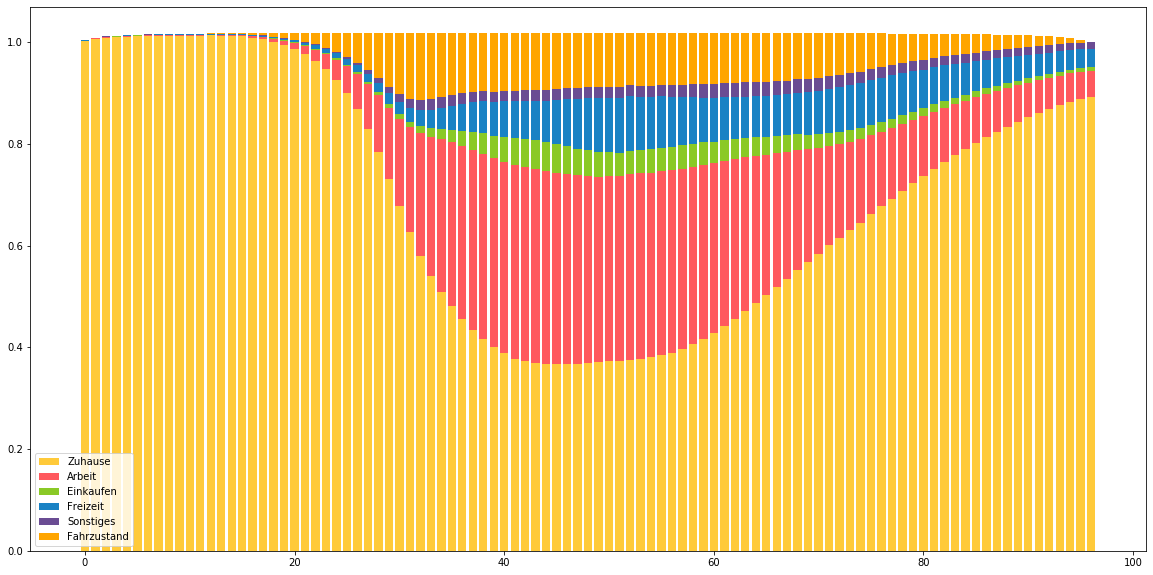

In [11]:
plt.figure(figsize=(20,10))

plt.bar(x, states[1], label="Zuhause", color='#FFCA3A' )
plt.bar(x, states[2], bottom=states[1], label="Arbeit", color='#FF595E');
plt.bar(x, states[3], bottom=[i+j for i,j in zip(states[1], states[2])], label="Einkaufen", color='#8AC926');
plt.bar(x, states[4], bottom=[i+j+k for i,j,k in zip(states[1], states[2], states[3])], label="Freizeit", color='#1982C4');
plt.bar(x, states[5], bottom=[i+j+k+l for i,j,k,l in zip(states[1], states[2], states[3], states[4])], label="Sonstiges", color='#6A4C93');
plt.bar(x, states[0], bottom=[i+j+k+l+m for i,j,k,l,m in zip(states[1], states[2], states[3], states[4], states[5])], label="Fahrzustand", color="orange");
plt.legend()

## Skalieren der Zustandsverteilungen zu Summe 1
### Vorübergehende Lösung -> Problemursache finden 

In [12]:
scaling_factor = []
for i in range(97):    
    scaling_factor.append(states[0][i] + states[1][i] + states[2][i] + states[3][i] + states[4][i] + states[5][i]) 
    for j in range(5):
        states[j][i] = states[j][i]/scaling_factor[i]

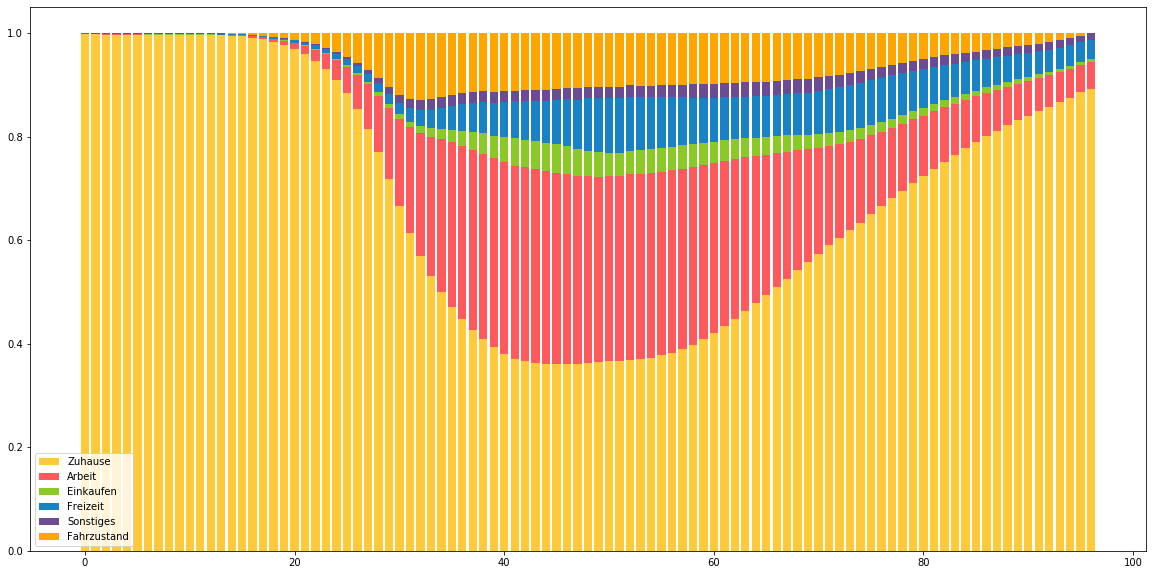

In [13]:
plt.figure(figsize=(20,10))

plt.bar(x, states[1], label="Zuhause", color='#FFCA3A' )
plt.bar(x, states[2], bottom=states[1], label="Arbeit", color='#FF595E');
plt.bar(x, states[3], bottom=[i+j for i,j in zip(states[1], states[2])], label="Einkaufen", color='#8AC926');
plt.bar(x, states[4], bottom=[i+j+k for i,j,k in zip(states[1], states[2], states[3])], label="Freizeit", color='#1982C4');
plt.bar(x, states[5], bottom=[i+j+k+l for i,j,k,l in zip(states[1], states[2], states[3], states[4])], label="Sonstiges", color='#6A4C93');
plt.bar(x, states[0], bottom=[i+j+k+l+m for i,j,k,l,m in zip(states[1], states[2], states[3], states[4], states[5])], label="Fahrzustand", color="orange");
plt.legend()

## Vergleich mit NHTS Daten

In [14]:
import pickle

path = r"C:\Users\thoma\Desktop\ev-modelling-repo\Datenauswertung\Werktag\Simulationsdaten\Zustandsverteilung.pickle"

states_nhts = pickle.load(open(path, "rb"))

Text(0.5, 1.0, 'Anteil der Flotte im Fahrzustand')

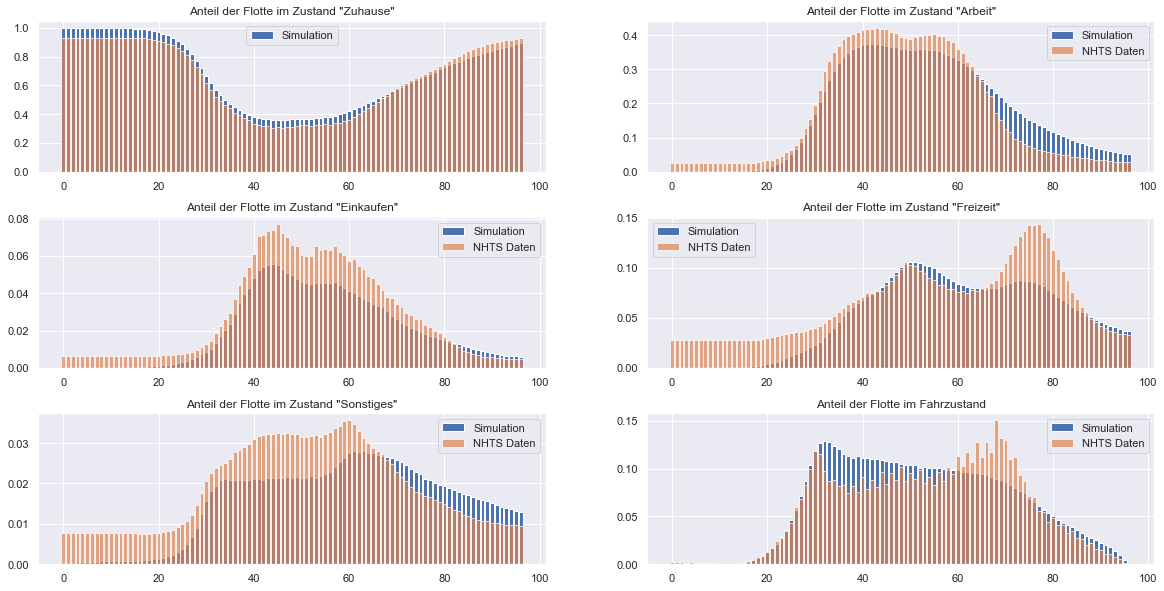

In [15]:
sns.set()
fig, axs = plt.subplots(3,2, figsize=(20,10))
plt.subplots_adjust(hspace=0.3)

axs[0][0].bar(x, states[1], label="Simulation")
axs[0][0].bar(x, states_nhts[1], alpha=0.7)
axs[0][0].legend()
axs[0][0].set_title("Anteil der Flotte im Zustand \"Zuhause\"")

axs[0][1].bar(x, states[2], label="Simulation")
axs[0][1].bar(x, states_nhts[2], alpha=0.7, label="NHTS Daten")
axs[0][1].legend()
axs[0][1].set_title("Anteil der Flotte im Zustand \"Arbeit\"")

axs[1][0].bar(x, states[3], label="Simulation")
axs[1][0].bar(x, states_nhts[3], alpha=0.7, label="NHTS Daten")
axs[1][0].legend()
axs[1][0].set_title("Anteil der Flotte im Zustand \"Einkaufen\"")

axs[1][1].bar(x, states[4], label="Simulation")
axs[1][1].bar(x, states_nhts[4], alpha=0.7, label="NHTS Daten")
axs[1][1].legend()
axs[1][1].set_title("Anteil der Flotte im Zustand \"Freizeit\"")

axs[2][0].bar(x, states[5], label="Simulation")
axs[2][0].bar(x, states_nhts[5], alpha=0.7, label="NHTS Daten")
axs[2][0].legend()
axs[2][0].set_title("Anteil der Flotte im Zustand \"Sonstiges\"")

axs[2][1].bar(x, states[0], label="Simulation")
axs[2][1].bar(x, states_nhts[0], alpha=0.7, label="NHTS Daten")
axs[2][1].legend()
axs[2][1].set_title("Anteil der Flotte im Fahrzustand")